In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

## Performing EDA on the Dataset

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 976.6+ KB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Finding the total number of churned and non-churned customers and also predicted the outlier fraction

churn = df[df['Exited'] == 1]
non_churn = df[df['Exited'] == 0]
outlierFraction = len(churn) / len(non_churn)
print("OutlierFraction:", outlierFraction)
print("Churned customers: {}".format(len(churn)))
print("Non churned customers: {}".format(len(non_churn)))     

OutlierFraction: 0.25580811252040686
Churned customers: 2037
Non churned customers: 7963


## Converting the Targeted Feature to Numerical Form

In [8]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
for feature in numerical_features:
    min_val = df[feature].min()
    max_val = df[feature].max()
    df[feature] = (df[feature] - min_val) / (max_val - min_val)


In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,0.538,0.324324,0.2,0.000000,1,1,1,0.506735,1,0,0,0
1,2,15647311,Hill,0.516,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,1,0
2,3,15619304,Onio,0.304,0.324324,0.8,0.636357,3,1,0,0.569654,1,0,0,0
3,4,15701354,Boni,0.698,0.283784,0.1,0.000000,2,0,0,0.469120,0,0,0,0
4,5,15737888,Mitchell,1.000,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,1,0


In [10]:
newdf = df.copy()

In [11]:
newdf.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,0.538,0.324324,0.2,0.000000,1,1,1,0.506735,1,0,0,0
1,2,15647311,Hill,0.516,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,1,0
2,3,15619304,Onio,0.304,0.324324,0.8,0.636357,3,1,0,0.569654,1,0,0,0
3,4,15701354,Boni,0.698,0.283784,0.1,0.000000,2,0,0,0.469120,0,0,0,0
4,5,15737888,Mitchell,1.000,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,1,0


In [12]:
# Check the class distribution of the targeted feature on the dataset.

class_distribution = newdf['Exited'].value_counts()
print("Class Distribution:", class_distribution)

Class Distribution: 0    7963
1    2037
Name: Exited, dtype: int64


## Train Test Split

In [13]:
X = newdf.drop(columns=['Exited','Surname'])
y = newdf['Exited']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
y_pred = rfc.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [19]:
# Calculating Evaluation Metrics

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,zero_division=0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [20]:
print("Confusion matrix:", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion matrix: [[1551   56]
 [ 210  183]]
Accuracy: 0.867
Precision: 0.7656903765690377
Recall: 0.46564885496183206
F1 Score: 0.579113924050633


## Resampling the dataset to address class imbalance and to improve the overall efficiency of the model

In [21]:
newdf_majority = newdf[newdf['Exited'] == 0]
newdf_minority = newdf[newdf['Exited'] == 1]

In [22]:
from sklearn.utils import resample

In [23]:
newdf_majority_undersampled = newdf_majority.sample(n=len(newdf_minority), random_state=42)
newdf_minority_oversampled = resample(newdf_minority, replace = True, n_samples=len(newdf_majority), random_state=42)
newdf_combined_resampled = pd.concat([newdf_majority_undersampled, newdf_minority_oversampled])
newdf_resampled = newdf_combined_resampled.sample(frac=1, random_state=42)

In [24]:
X_resampled = newdf_resampled.drop(columns=['Exited','Surname'])
y_resampled = newdf_resampled['Exited']

## Splitting the resampled data and train the machine learning model on the resampled data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

## Evaluating the performance of the model on the testing set

In [28]:
y_pred = rfc.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [30]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,zero_division=0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [31]:
print("Confusion matrix:", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion matrix: [[ 274  133]
 [   8 1585]]
Accuracy: 0.9295
Precision: 0.9225844004656577
Recall: 0.9949780288763339
F1 Score: 0.957414678344911


## Plotting the Confusion Matrix

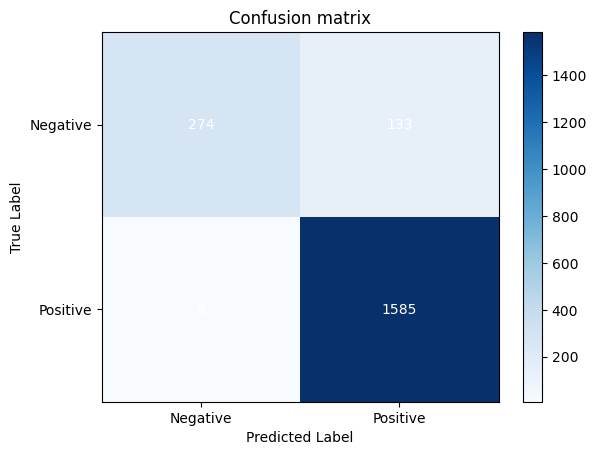

In [32]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(cm, cmap=plt.cm.Blues, aspect='auto')
plt.title("Confusion matrix")
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(2), ['Negative','Positive'])
plt.yticks(np.arange(2), ['Negative','Positive'])

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(cm[i,j]), ha='center', va='center', color='white')
plt.show()

In [33]:
# Generating a Classificaion Report

from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification report:", class_report)

Classification report:               precision    recall  f1-score   support

           0       0.97      0.67      0.80       407
           1       0.92      0.99      0.96      1593

    accuracy                           0.93      2000
   macro avg       0.95      0.83      0.88      2000
weighted avg       0.93      0.93      0.92      2000



In [34]:
# Predicting probabilities for the testing set

y_prob = rfc.predict_proba(X_test)[:, 1]

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [36]:
# Calculating the AUC score

auc = roc_auc_score(y_test, y_prob)
print("AUC:",auc)

AUC: 0.9916449577466526


## Plotting Receiver Operating Characteristic Curve

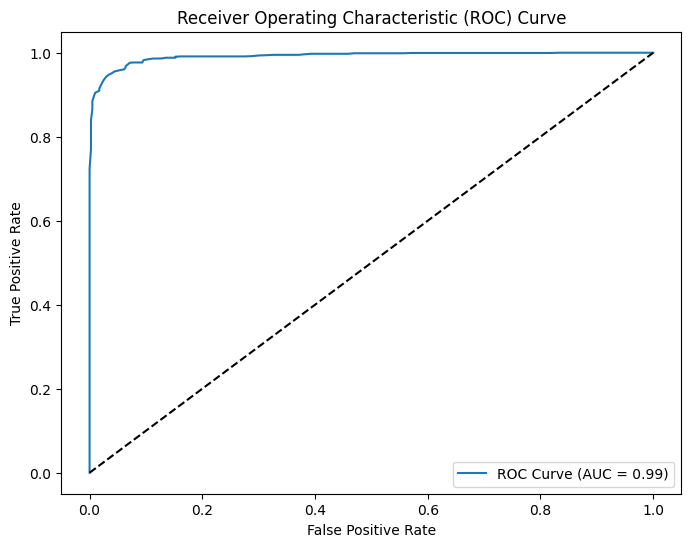

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc='lower right')
plt.show()